# Model Training

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime
from numpy import inf
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
training_dataset = pd.read_csv('../2_database/data_processing/02_03_training_dataset.csv',
                               sep=';')

validation_dataset = pd.read_csv('../2_database/data_processing/02_03_validation_dataset.csv',
                                 sep=';')

In [5]:
print("Training and Validation size: " + str(training_dataset.shape) + " / " + str(validation_dataset.shape))

Training and Validation size: (420, 53) / (140, 53)


In [6]:
training_dataset.head()

,pct_pol_neg_rel,education_var_01_quantity_pct,family_var_01_suitable_pct,family_var_01_semi_suitable_pct,family_var_01_inappropriate_pct,fertility_var_01_has_children_pct,fertility_var_01_children_born_pct,fertility_var_01_children_borned_live_pct,fertility_var_01_children_borned_dead_pct,fertility_var_02_married_pct,...,state_pr,state_rj,state_rn,state_ro,state_rr,state_rs,state_sc,state_se,state_sp,state_to
0,0.350775,1.117053,0.000000,0.993414,1.667300,0.946110,1.059396,1.034859,1.747131,1.032382,...,0,0,0,0,0,0,1,0,0,0
1,0.267845,1.114802,0.952957,1.169540,47.418210,1.001920,1.150179,1.138941,1.531662,1.138413,...,0,0,0,0,0,0,1,0,0,0
2,0.408816,1.035698,0.616752,1.170773,2.452725,0.969964,1.330319,1.317376,1.571041,1.042142,...,0,0,0,0,0,0,0,0,0,0
3,0.414336,0.970031,0.876919,1.228749,2.848914,0.962917,1.129891,1.123553,1.258481,1.075063,...,0,0,0,0,0,0,0,0,0,0
4,0.359050,1.009907,0.734807,1.617280,9.239346,0.955090,1.159441,1.180107,0.803960,1.046754,...,0,0,0,0,0,0,0,0,1,0


In [8]:
for col in training_dataset.columns:
    print(col)

pct_pol_neg_rel
education_var_01_quantity_pct
family_var_01_suitable_pct
family_var_01_semi_suitable_pct
family_var_01_inappropriate_pct
fertility_var_01_has_children_pct
fertility_var_01_children_born_pct
fertility_var_01_children_borned_live_pct
fertility_var_01_children_borned_dead_pct
fertility_var_02_married_pct
fertility_var_02_separated_pct
fertility_var_02_divorced_pct
fertility_var_02_widow_pct
fertility_var_02_single_pct
fertility_var_03_total_pct
work_var_01_regular_pct
work_var_01_irregular_pct
social_indicator_var_01_15_to_24_years_pct
social_indicator_var_01_25_to_59_years_pct
social_indicator_var_01_60_to_more_years_pct
social_indicator_var_02_suitable_pct
social_indicator_var_02_semi_suitable_pct
social_indicator_var_02_inappropriate_pct
social_indicator_var_03_responsable_illiterate_pct
social_indicator_var_03_inappropriate_residence_pct
social_indicator_var_03_responsable_illiterate_and_inappropriate_residence_pct
enem_var_01_enem_score_mean_pct
enem_var_01_enem_score

### Testing different algorithms

In [16]:
####### parameters for models' tests ######
scoring='neg_mean_squared_error'
n_splits=2
###########################################

models = []

models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

In [1]:
array = training_dataset.values

X_training = array[:, 1:]
Y_training = array[:, 0]

NameError: name 'training_dataset' is not defined

Linear Regression 2019-07-30 18:51:57.533623
Random Forest 2019-07-30 18:51:57.563986
Gradient Boosting 2019-07-30 18:51:57.653584
The End - 2019-07-30 18:51:57.823131


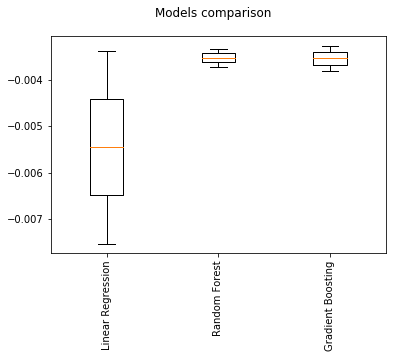

In [18]:
# prepare configuration for cross validation
seed = 7

# evaluate each model in turn
results = []
names = []

for model_name, model in models:
    print(model_name + ' ' + str(datetime.datetime.now()))
    kfold = model_selection.KFold(n_splits=n_splits,
                                  random_state=seed)
    cv_results = model_selection.cross_val_score(model,
                                                 X_training,
                                                 Y_training,
                                                 cv=kfold,
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(model_name)

print('The End - ' + str(datetime.datetime.now()))

# boxplot models comparison
fig = plt.figure()
fig.suptitle('Models comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

### Function for regression evaluation

In [19]:
def regression_evaluation(Y_training, y_training_pred, Y_validation, y_validation_pred):
    coin_simulation = np.random.randint(int(np.quantile(Y_training, 0)*10), int(np.quantile(Y_training, 1)*10), size=len(Y_validation)) * 0.1

    print("Observed validation (min, med, max): " + str(np.round(np.min(Y_validation), 5)) + " , " + str(np.round(np.median(Y_validation), 5)) + " , " + str(np.round(np.max(Y_validation), 5)) + "\n" + 
          "Predicted validation (min, med, max): " + str(np.round(np.min(y_validation_pred), 5)) + " , " + str(np.round(np.median(y_validation_pred), 5)) + " , " + str(np.round(np.max(y_validation_pred), 5)))

    print("\n")

    print("RMSE training: " + str(np.round(np.sqrt(mean_squared_error(Y_training, y_training_pred)), 5)) + "\n" +
          "RMSE validation: " + str(np.round(np.sqrt(mean_squared_error(Y_validation, y_validation_pred)), 5)) + "\n" + 
          "RMSE validation vs coin: " + str(np.round(np.sqrt(mean_squared_error(Y_validation, coin_simulation)), 5)))

    plt.ylabel("predicted")
    plt.xlabel("observed")
    plt.scatter(Y_training, y_training_pred)
    plt.scatter(Y_validation, y_validation_pred)

### 1 - Testing Linear Regression

In [24]:
array = training_dataset.values

#X_training = training_dataset[['social_indicator_var_03_responsable_illiterate_pct',
#                               'fertility_var_02_separated_pct']]

X_training = array[:, 1:]
Y_training = array[:, 0]

In [25]:
array = validation_dataset.values

#X_validation = validation_dataset[['social_indicator_var_03_responsable_illiterate_pct',
#                                   'fertility_var_02_separated_pct']]
X_validation = array[:, 1:]
Y_validation = array[:, 0]

In [26]:
model = LinearRegression()
model.fit(X_training, Y_training)

y_training_pred = model.predict(X_training)
y_validation_pred = model.predict(X_validation)

Observed validation (min, med, max): 0.22774 , 0.38155 , 0.5437
Predicted validation (min, med, max): 0.19202 , 0.37451 , 0.45084


RMSE training: 0.04844
RMSE validation: 0.06279
RMSE validation vs coin: 0.17712


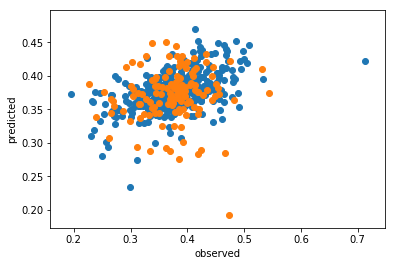

In [27]:
regression_evaluation(Y_training, y_training_pred, Y_validation, y_validation_pred)

### 3 - Testing Gradient Boosting

In [20]:
array = training_dataset.values

X_training = array[:, 1:]
Y_training = array[:, 0]

In [21]:
array = validation_dataset.values

X_validation = array[:, 1:]
Y_validation = array[:, 0]

In [22]:
model = GradientBoostingRegressor(n_estimators=1000,
                                  learning_rate=0.01,
                                  min_samples_leaf=0.01,
                                  max_depth=2,
                                  random_state=7)
model.fit(X_training, Y_training)

y_training_pred = model.predict(X_training)
y_validation_pred = model.predict(X_validation)

Observed validation (min, med, max): 0.22774 , 0.38155 , 0.5437
Predicted validation (min, med, max): 0.27011 , 0.37607 , 0.43125


RMSE training: 0.03829
RMSE validation: 0.0552
RMSE validation vs coin: 0.177


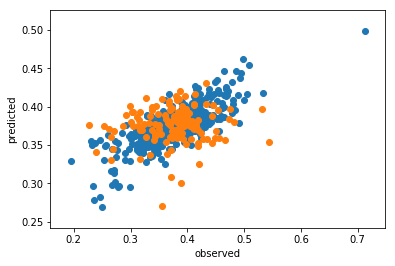

In [23]:
regression_evaluation(Y_training, y_training_pred, Y_validation, y_validation_pred)